## learning curves
##### 1) cost function vs num of iterations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [19]:
def train(X_train, Y_train, alpha): #alpha is the learning rate
    #converting the data sets to numpy arrays
    X_train=np.array(X_train, dtype=float)
    data_points, num_parameter=X_train.shape #(m,n)
    X_train=np.insert(X_train, num_parameter,1,axis=1)#inserts a 1s column to the numpy array
    Y_train=np.array(Y_train, dtype=float)
    
    bias_matrix=np.zeros(num_parameter+1)# 'theta'
    
    tolerence=.01 #value of the norm of the gradient of the cost function
    
    grad_vctr=(np.matmul(np.transpose(X_train), (np.matmul(X_train,bias_matrix)-Y_train)))/data_points
    norm_grad=np.sum(grad_vctr**2)
    count=0
    cost_func=np.sum((Y_train-np.matmul(X_train,bias_matrix))**2)
    count_arr=[]
    cost_func_arr=[]
    diff=cost_func
    while (diff>10):
        bias_matrix=bias_matrix-alpha*grad_vctr
        grad_vctr=(np.matmul(np.transpose(X_train), (np.matmul(X_train,bias_matrix)-Y_train)))/data_points
        count_arr.append(count)
        cost_func_arr.append(cost_func)
        plt.scatter(count, cost_func, s=10, c='b')
        cost_func1=np.sum((Y_train-np.matmul(X_train,bias_matrix))**2)
        diff=abs(cost_func1-cost_func)
        cost_func=cost_func1
        count=count+1
    plt.plot(count_arr,cost_func_arr, 'r-')

In [3]:
class GD_LR:
    '''
    we cant initialise the bias matrix 'theta' at the time of creation of the GD_LR object, as we are not aware of the
    size of the dataset right now.
    
    this is a class which implements linear regression using batch gradient descent for more than 1 input parameters
    '''
    
    def train(self, X_train, Y_train):
        #converting the data sets to numpy arrays
        X_train=np.array(X_train, dtype=np.float64)
        data_points, num_parameter=X_train.shape #(m,n)
        X_train=np.insert(X_train, num_parameter,1.0,axis=1)#inserts a 1s column to the numpy array
        Y_train=np.array(Y_train, dtype=np.float64)
        
        self.bias_matrix=np.zeros(num_parameter+1)# 'theta'
        alpha=.1 #learning rate
        tolerence=.1 #value of the norm of the gradient of the cost function
        
        grad_vctr=(np.matmul(np.transpose(X_train), (np.matmul(X_train,self.bias_matrix)-Y_train)))/data_points
        
        for i in range (100):
            self.bias_matrix=self.bias_matrix-alpha*grad_vctr
            grad_vctr=(np.matmul(np.transpose(X_train), (np.matmul(X_train,self.bias_matrix)-Y_train)))/data_points

        
    def predict(self, X_test):
        #arr1: the testing data/ data for which values have to be predicted
        X_test=np.array(X_test, dtype=np.float64)
        data_points, num_parameter=X_test.shape #(m,n)
        X_test=np.insert(X_test, num_parameter, 1,axis=1)
        num_predicted=np.matmul(X_test, self.bias_matrix)
        return num_predicted
    
    def score(self, arr1, arr2):
        #arr1: data for which target values are given by arr2
        #we will first predict the target values for arr1 and then compare them with the values in arr2
        num_target=np.array(arr2, dtype=np.float64)
        num_input=np.array(arr1, dtype=np.float64)
        
        num_predicted=self.predict(num_input)
        mean=np.mean(num_target)
        numerator=np.sum((num_predicted-num_target)**2)
        denominator=np.sum((mean-num_target)**2)
        COD=1-(numerator/denominator)
        return COD

##### before plotting the learning curves we will compare the predictions from my own class and the builtin class

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection

In [5]:
housing = datasets.fetch_california_housing()
np_data=np.array(housing.data, dtype = float)
for i in range(8):
    print(np_data[:, i].max(), np_data[:, i].min())
#clearly the data requires scaling to avoid overflow errors
for i in range(8):
    mean=np_data[:,i].mean()
    std_dev=np_data[:,i].std()
    np_data[:,i]=(np_data[:,i]-mean)/std_dev
np_target=np.array(housing.target,dtype=float)
X_train, X_test, Y_train, Y_test=model_selection.train_test_split(np_data, np_target)

print('after')
for i in range(8):
    print(np_data[:, i].max())

15.0001 0.4999
52.0 1.0
141.9090909090909 0.8461538461538461
34.06666666666667 0.3333333333333333
35682.0 3.0
1243.3333333333333 0.6923076923076923
41.95 32.54
-114.31 -124.35
after
5.858285811780286
1.8561815225324745
55.16323628125675
69.5717132557033
30.250330218731502
119.41910318829312
2.9580676211031918
2.625280057018667


In [6]:
alg1=LinearRegression()
alg1.fit(X_train, Y_train)
print("built-in algo score on training data: ", alg1.score(X_train,Y_train))
print("built-in algo score on testing data: ", alg1.score(X_test, Y_test))

built-in algo score on training data:  0.6052719609738814
built-in algo score on testing data:  0.608281157031418


In [7]:
alg2=GD_LR()
alg2.train(X_train, Y_train)
print("My algo score on training data: ", alg2.score(X_train,Y_train))
print("My algo score on testing data: ", alg2.score(X_test, Y_test))

My algo score on training data:  0.5837144877455878
My algo score on testing data:  0.5860013330898237


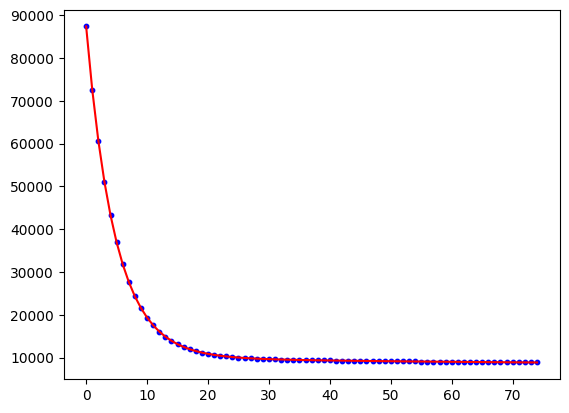

In [25]:
train(X_train, Y_train, .1)

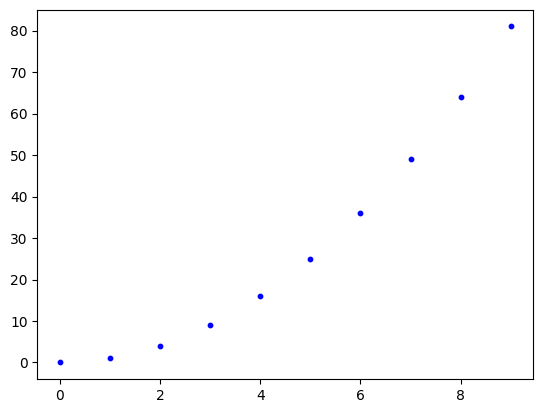

In [9]:
for i in range(10):
    plt.scatter(i, i*i, s=10, c='b')
plt.show()

In [10]:
np_array=np.array([1,2,3,5,6,7], dtype=int)
np_array=np.reshape(np_array,(2,3))
np_array[0:, 1]=np_array[:, 1]-1
np_array

array([[1, 1, 3],
       [5, 5, 7]])